<a href="https://colab.research.google.com/github/TEERAWATL/Object_detection_by_torchvision_faster_RCNN_Resnet50/blob/main/Object_detection_by_torchvision_faster_RCNN_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install torch torchvision pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving face_1_test.jpg to face_1_test (1).jpg


In [22]:
def load_model():
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    if torch.cuda.is_available():
        model.cuda()

    return model

def detect_objects(image_path, model, threshold=0.5):
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(image)

    with torch.no_grad():
        if torch.cuda.is_available():
            img_tensor = img_tensor.cuda()
        predictions = model([img_tensor])

    filtered_preds = []
    for idx, score in enumerate(predictions[0]['scores']):
        if score > threshold:
            filtered_preds.append({
                'bbox': predictions[0]['boxes'][idx].cpu().numpy(),
                'label': predictions[0]['labels'][idx].item(),
                'score': score.item()
            })

    return filtered_preds

def display_image_with_predictions(image_path, detections, class_names):
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show the original image
    ax[0].imshow(image)
    ax[0].set_title("Original Image")

    # Show the image with predicted bounding boxes
    ax[1].imshow(image)
    ax[1].set_title("Image with Predicted Locations")

    for detection in detections:

        bbox = detection['bbox']
        class_id = detection['label']  # Change this line to use the correct key
        class_name = class_names[class_id]
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=1, edgecolor='r', facecolor='none')
        ax[1].add_patch(rect)
        ax[1].text(bbox[0], bbox[1], class_name, fontsize=12, color='r', bbox=dict(facecolor='white', edgecolor='r', alpha=0.6))

    plt.show()



Detections:
Label: 1, Score: 1.00, BBox: [609.8101  145.64754 755.0064  476.99997]
Label: 1, Score: 1.00, BBox: [252.89713  125.052574 420.18903  474.74893 ]
Label: 1, Score: 1.00, BBox: [673.05804   22.914597 833.1502   469.91403 ]
Label: 1, Score: 1.00, BBox: [117.65302 132.99054 279.4218  476.99997]
Label: 1, Score: 1.00, BBox: [ 49.24944  25.20782 189.32526 476.20374]
Label: 1, Score: 0.99, BBox: [404.75705   65.235756 543.56104  476.99997 ]
Label: 1, Score: 0.99, BBox: [506.7677  130.44908 646.1788  473.41733]
Label: 1, Score: 0.98, BBox: [408.40277    6.502943 546.3321   163.39362 ]
Label: 1, Score: 0.97, BBox: [305.2917    20.945219 425.97516  201.01945 ]
Label: 1, Score: 0.95, BBox: [520.2456   16.93953 685.88025 190.86595]
Label: 1, Score: 0.92, BBox: [174.76494   24.201773 322.02618  207.94934 ]
Label: 1, Score: 0.74, BBox: [233.60884 168.67813 313.3502  469.1864 ]
Label: 1, Score: 0.60, BBox: [203.81046 134.00131 281.35574 468.5112 ]


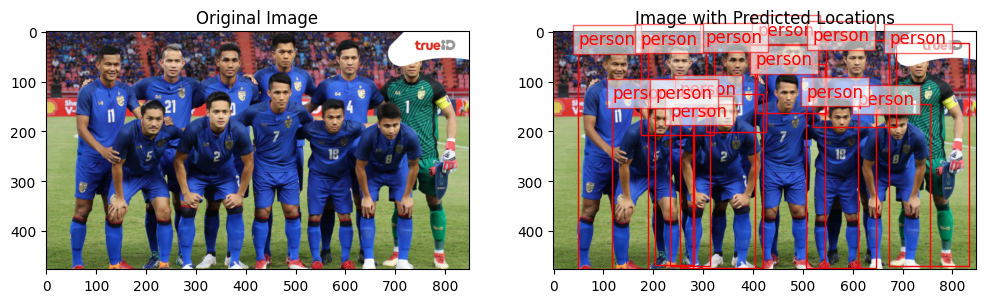

In [23]:
# Example usage
model = load_model()
detections = detect_objects(image_path, model, threshold=0.5)

print("Detections:")
for detection in detections:
    print("Label: {}, Score: {:.2f}, BBox: {}".format(detection['label'], detection['score'], detection['bbox']))

# print Out the result
class_names = ['background', 'person', 'dog', 'cat']  # Replace this with your actual class names list
display_image_with_predictions(image_path, detections, class_names)
